In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [ ]:
#link for dataset
#Testing.csv: https://drive.google.com/file/d/1puWHyaFt5FG0Hc7NHT4RjA7Ee5m8A0DI/view?usp=sharing
#Training.csv: https://drive.google.com/file/d/1alQYt7OXxaZ8lmft9622E-HILHI2Vq6C/view?usp=sharing

##reading dataset and checking whether dataset is balanced or not

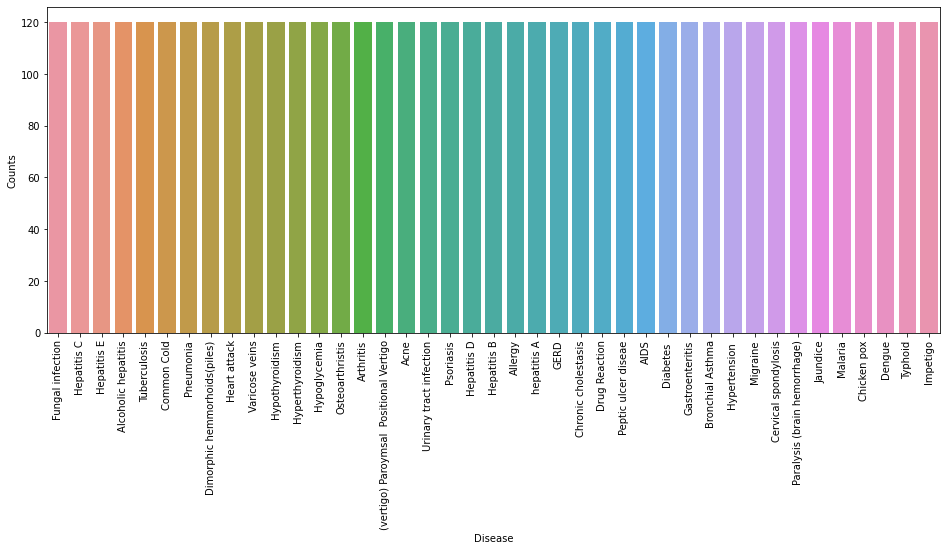

In [ ]:

data = pd.read_csv("Training.csv").dropna(axis = 1)
 
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (16,6))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

target column is of object datatype, so encoding the target column in numerical form to train a machine learning model

In [ ]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [ ]:
print(data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


##Splitting the data for training and testing the model

In [ ]:

X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


##Model Building

In [ ]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


##Building robust classifier by combining all models
To build a robust model we can combine i.e. take the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one.

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


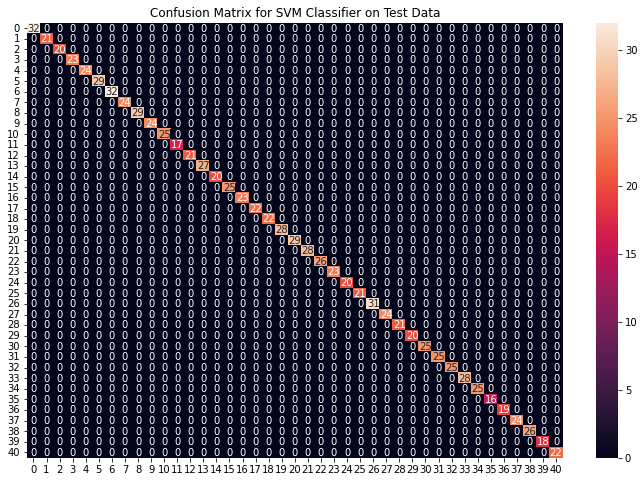

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


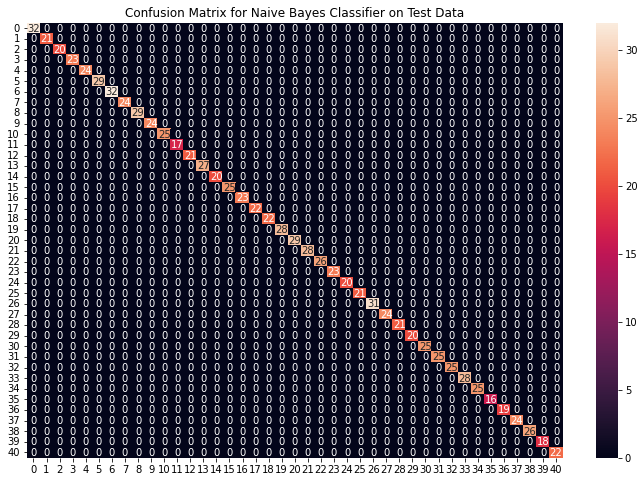

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


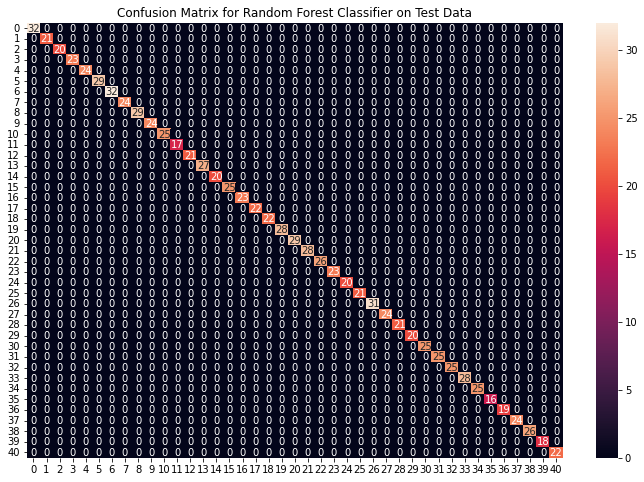

In [ ]:
#SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

#Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


##Fitting the model on whole data and validating on the Test dataset
From the above confusion matrices, we can see that the models are performing very well on the unseen data. Now we will be training the models on the whole train data present in the dataset that we downloaded and then test our combined model on test data present in the dataset.

Accuracy on Test dataset by the combined model: 100.0


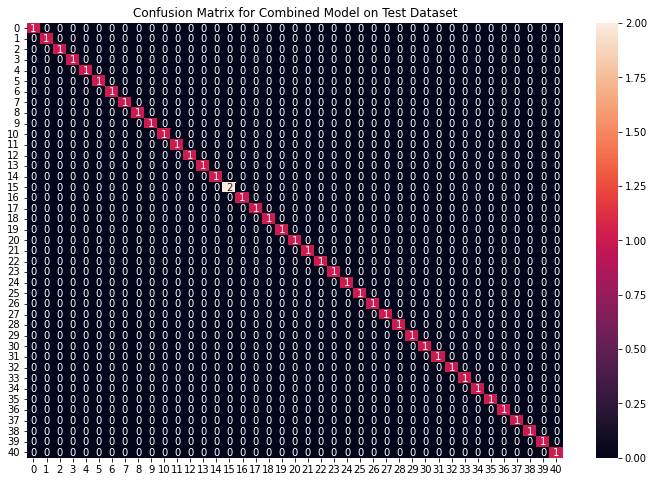

In [ ]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
			k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


##Creating a function that can take symptoms as input and generate predictions for disease
We can see that our combined model has classified all the data points accurately.
Now we have created a function that takes symptoms as inputs and will give us the predicted disease as output.

In [ ]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": nb_prediction,
		"final_prediction":final_prediction
	}
	print("***************************************************************************************************")
	print("Based on the inputs of symptoms given by user and some detected by technology present in AV,\nthe disease or health issue predicted is: ",predictions["final_prediction"])
	print("***************************************************************************************************")
	print("---------------------------------------------------------------------------------------------------------------------------------------------------")
	return predictions["final_prediction"]

# Testing the function
prediction = predictDisease("Knee Pain,Hip Joint Pain")


***************************************************************************************************
Based on the inputs of symptoms given by user and some detected by technology present in AV,
the disease or health issue predicted is:  Osteoarthristis
***************************************************************************************************
---------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
usr_input = input("Are you pregnant:")
usr_age = int(input("Enter your age:"))

Are you pregnant:no
Enter your age:30


In [ ]:

if prediction=='Tuberculosis' or prediction=='Common Cold' or prediction=='Pneumonia' or prediction=='Bronchial Asthma':
  print("\nCommands passed by AI to AV:-")
  print("1) plan route with least traffic")#to avoid higher levels of air pollution
  print("2) Set Air conditioner to recirculation mode")
  print("3) Set Temperature:- 28C")
elif prediction=='Fungal infection' or prediction=='Acne' or prediction=='Urinary tract infection' or prediction=='Allergy' or prediction=='Drug reaction':
  print("\nCommands passed by AI to AV:-")
  print("1) plan route with least traffic")#to avoid higher levels of air pollution
  print("2) Set Air conditioner to recirculation mode")
  print("3) Set Temperature:- 24C")
elif prediction=='Osteoarthristis' or prediction=='Arthritis' or usr_input=='yes' or usr_age>=65:
  print("\nCommands passed by AI to AV:-")
  print("1) plan route with least potholes")#for passenger's comfort in such cases
  print("2) Maintain Uniform velocity")#to avoid unusual jerks
  print("3) Set Maximum Speed=50kmph")
  print("4) Set braking distance: 150feet")
elif prediction=='Hypertension' or prediction=='Migraine'  or prediction=='Cervical spondylosis' or prediction=='Drug reaction': 
  print("\nCommands passed by AI to AV:-")
  print("1) Reduce system sounds")
  print("2) Turn off music system")
  print("3) Set temperature:- 18C")
  print("4) Book doctors appointment")#as per passengers's verdict
elif prediction=='Heart attack' or prediction=='Paralysis':
  print("\nCommands passed by AI to AV:-")
  print("1) plan route to nearest hospital")
  print("2) Contact emergency nos")# passenger's family
  print("3) Set temperature:- 18C")# excessive sweating
elif prediction=='Jaundice' or prediction=='Malaria' or prediction=='Chicken pox' or prediction=='Dengue' or prediction=='Typhoid':
  print("\nCommands passed by AI to AV:-")
  print("1) Book doctor's appointment")#as per passengers's verdict
  print("2) Set temperature:- 28C")
else:
  print("1) Book doctor's appointment")#as per passengers's verdict

import time
import progressbar
from tqdm import tqdm
def update():
  widgets = [' [',
      progressbar.Timer(format= 'Processing: %(elapsed)s'),
      '] ',
      progressbar.Bar('*'),
      ]

  bar = progressbar.ProgressBar(max_value=100,
                widgets=widgets)

  for i in range(100):
    time.sleep(0.0009)
    bar.update(i)
    
    
  for j in tqdm (range (100), 
                desc="Updating Commands to AV", 
                ascii=False, ncols=75):
      time.sleep(0.01)
        
  print("Complete.")
update()

 [Processing: 0:00:00] |****************************************************  |


Commands passed by AI to AV:-
1) plan route with least potholes
2) Maintain Uniform velocity
3) Set Maximum Speed=50kmph
4) Set braking distance: 150feet


Updating Commands to AV: 100%|███████████| 100/100 [00:01<00:00, 96.14it/s]

Complete.
